# Lezione 2 - NumPy e MatplotLib
## NumPy
NumPy è la libreria fondamentale per il calcolo scientifico in Python. Questa libreria fornisce un oggetto `numpy.ndarray` (sostanzialmente un array multidimensionale), e diversi oggetti derivati come "masked array", e un assortimento di funzioni per operazioni con array in modo efficiente. Per iniziare ad usare NumPy, si importa il modulo, solitamente con l'alias np:

In [50]:
import numpy as np

La libreria di NumPy è fondamentalmente un'interfaccia di alto livello ad una libreria scritta in C, quindi è molto veloce in termini di prestazioni rispetto a librerie scritte puramente in Python.

### Array di NumPy
Gli array di NumPy sono oggetti mutabili, cioé possono essere modificati in memoria. E' possibile creare un `numpy.ndarray` in molti modi differenti:
* A partire da una lista

In [51]:
a_list = [1, 2, 3, 4]
a_np_array = np.array(a_list)
print(a_np_array)

[1 2 3 4]


* Generando un array di soli zeri

In [52]:
null_array = np.zeros(4)
print(null_array)

[0. 0. 0. 0.]


* Generando un array costituito da elementi vuoti (più veloce dei precedenti, ma non si è certi sul contenuto dell'array)

In [53]:
empty_array = np.empty(4)
print(empty_array)

[0. 0. 0. 0.]


* Generando un array di un range di interi (simile a `range()` visto per le liste)

In [54]:
first = 1
last = 11
step = 2
range_array = np.arange(first, last, step)
print(range_array)

[1 3 5 7 9]


* Generando un array di valori equamente distanziati in un intervallo specificato

In [55]:
dim = 10
linspace_array = np.linspace(first, last, dim)
print(linspace_array)

[ 1.          2.11111111  3.22222222  4.33333333  5.44444444  6.55555556
  7.66666667  8.77777778  9.88888889 11.        ]


#### NOTA BENE
Esiste una differenza fondamentale tra l'oggetto `ndarray` e le `list`: `ndarray` ha una grandezza fissata dopo la dichiarazione; questo non vieta l'aggiunta di nuovi elementi all'array, ma implica tecnicamente che deve essere creato un nuovo array e il precedente deve essere deallocato. Di conseguenza, date le operazioni di gestione della memoria coinvolte quando viene aggiunto un elemento ad un `ndarray`, è buona prassi creare l'array appena prima di usarlo a partire da una lista e riempire la lista al suo posto se si deve ricorrere a dei loop.

### Operazioni tra array
Le operazioni tra array possono essere scritte in forma compatta, rendendole più chiare e al contempo ottenendo tempi di esecuzione più veloci, grazie all'uso di funzioni interne alla libreria ottimizzate per lo scopo. Per esempio, la moltiplicazione elemento per elemento:

* Per le liste

In [56]:
dim = 20
list_a = list(range(dim))
list_b = list(range(dim))

list_prod = [list_a[i] * list_b[i] for i in range(len(list_a))]
print(list_prod)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361]


* Per gli array

In [57]:
array_a = np.array(list_a) # anche np.arange(dim)
array_b = np.array(list_b) # anche np.arange(dim)

array_prod = array_a * array_b
print(array_prod)

[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324 361]


### Operazioni sugli array
Dato un `ndarray` è possibile svolgere delle operazioni che coinvolgono tutti i suoi elementi, per esempio:
* `sum()` somma tutti gli elementi dell'array
* `prod()` moltiplica tra loro tutti gli elementi dell'array
* `cumsum()` (cumulative sum) calcola per ciascun elemento dell'array la somma di tutti gli elementi che lo precedono
* `cumprod()` (cumulative product) calcola per ciascun elemento dell'array il prodotto di tutti gli elementi che lo precedono

In [58]:
some_array = np.arange(1, 11)
print(some_array)
print(some_array.sum())
print(some_array.prod())
print(some_array.cumsum())
print(some_array.cumprod())

[ 1  2  3  4  5  6  7  8  9 10]
55
3628800
[ 1  3  6 10 15 21 28 36 45 55]
[      1       2       6      24     120     720    5040   40320  362880
 3628800]


### Array multi-dimensionali

Per creare array multi-dimensionali, si deve passare come argomento una lista di liste della stessa dimensione. Ciascuna delle liste rappresenta una riga dell'array

In [59]:
multid_array = np.array([[1, 2, 3], [4, 5, 6]])
print(multid_array)
print(multid_array.shape) # tupla che contiene le dimensioni dell'array

[[1 2 3]
 [4 5 6]]
(2, 3)


E' anche possibile creare array multi-dimensionali usando `np.zeros()` o `np.ones()`

In [60]:
dim = 5
an_array = np.zeros(dim)
a_second_array = np.ones(dim)

print(an_array)
print(a_second_array)

[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1.]


#### NOTA BENE
Accedere agli elementi di un array con `A[1, 2]` è più veloce rispetto a `A[1][2]`, perché in quest'ultimo caso viene creato un altro array in memoria.

### NumPy universal functions
Le "universal functions" in Python sono implementate in modo simile alle operazioni compatte sugli array, è possibile chiamare le funzioni sull'intero array e il risultato è un array delle funzioni chiamate sui singoli elementi. Per esempio, l'esponenziale di un array è un array che ha per elementi l'esponenziale di ciascun elemento.

## MatPlotLib
MatPlotLib è una libreria di Python utilizzata per plottare grafici, per esempio funzioni e istogrammi. L'oggetto fondamentale della libreria è `matplotlib.pyplot`, che viene importato all'interno del programma con

In [61]:
from matplotlib import pyplot as plt

Quando viene usata la libreria MatPlotLib, due oggetti vengono creati e gestiti da Python:
* `matplotlib.axes` viene usato per plottare i dati
* `matplotlib.figure` concerne gli aspetti grafici

Per creare un'immagine vuota si usa

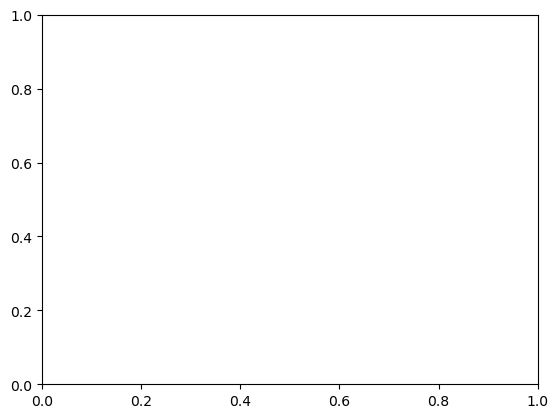

In [62]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
plt.show()

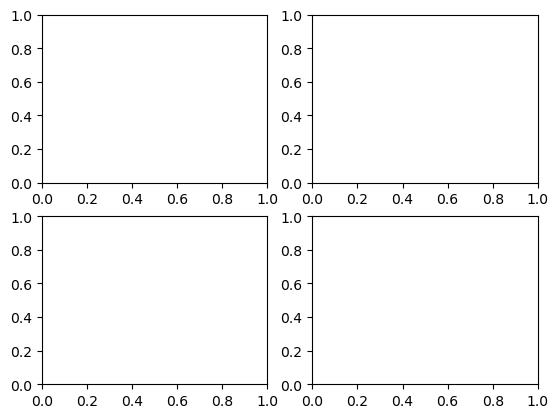

In [63]:
fig, ax = plt.subplots(nrows = 2, ncols = 2)
plt.show()
# plt.savefig("example.png")

Per salvare un plot si usa `plt.savefig("nomefile.estensione")`.

### Plot di funzioni
Per plottare una funzione bisogna innanzitutto definire il set dei punti su cui la si vuole calcolare e successivamente calcolare il suo valore puntuale servendosi di universal functions, oppure se non si dispone di una universal function bisogna scrivere un loop

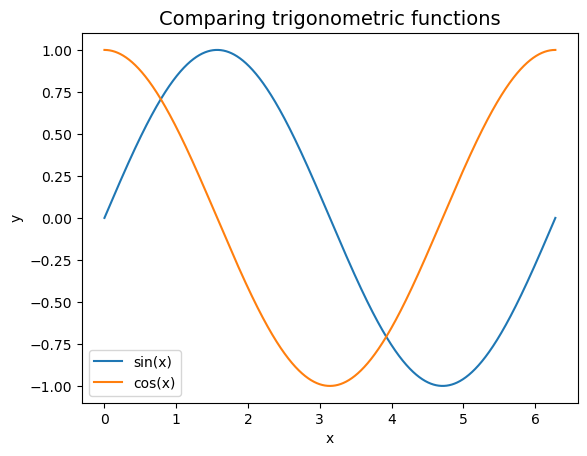

In [64]:
# Punti
x_coord = np.linspace(0, 2 * np.pi, 10000)
y_coord_1 = np.sin(x_coord)
y_coord_2 = np.cos(x_coord)

# Plot
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.plot(x_coord, y_coord_1, label="sin(x)")
ax.plot(x_coord, y_coord_2, label="cos(x)")
ax.set_title("Comparing trigonometric functions", size = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

Per una guida più approfondita sulle librerie NumPy e MatPlotLib, guardare la repository GitHub di [Luke Polson](https://github.com/lukepolson)